<a href="https://colab.research.google.com/github/ilvy22/DeepLearning/blob/master/20200130_Keras_MLP_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1/31(금), Keras 실습 "MLP로 Regression 구현하기"

## 1. Keras 임포트

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers

## 파일 업로드

In [39]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

MessageError: ignored

## 2. 데이터 분석 (EDA)

2.1. 학습데이터 확인 (X1)

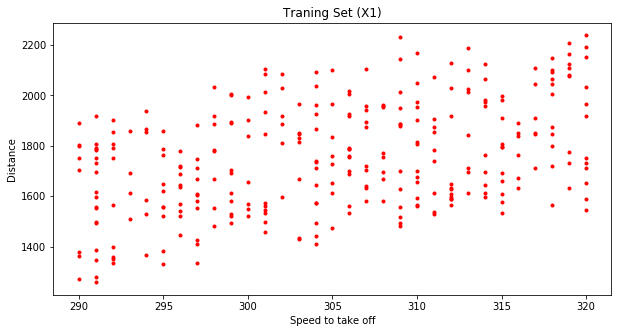

In [238]:
train_csv_data = np.loadtxt('trainset.csv', unpack=True, delimiter=',', skiprows=1)
plt.title("Traning Set (X1)")
plt.xlabel('Speed to take off')
plt.ylabel('Distance')
plt.plot(train_csv_data[0], train_csv_data[2], 'r.')

2.2. 학습데이터 확인 (X2)

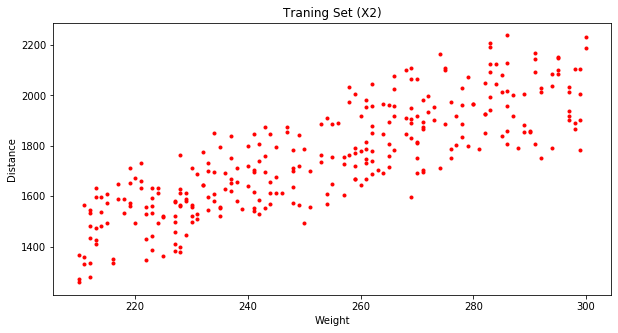

In [239]:
plt.title("Traning Set (X2)")
plt.xlabel('Weight')
plt.ylabel('Distance')
plt.plot(train_csv_data[1], train_csv_data[2], 'r.')

## 3. 학습데이터 전처리

3.1. 학습데이터 표준화

In [0]:
train_csv_data = np.loadtxt('trainset.csv', unpack=True, delimiter=',', skiprows=1)
num_points = len(train_csv_data[0])
# print("points : ", num_points)
train_num_colum = len(train_csv_data)
train_mean = []
train_std = []
for i in range(train_num_colum):
  train_mean.append(train_csv_data[i].mean())
  train_std.append(train_csv_data[i].std())
  train_csv_data[i] -= train_csv_data[i].mean()
  train_csv_data[i] /= traintrain_csv_datacsvdata[i].std()

3.2. 학습데이터 행과 열 변환 (Transpose)

In [0]:
# x_data생성
x_data = np.array([train_csv_data[0], train_csv_data[1]])
x_data = np.array(x_data).transpose()
# y_data reshape
y_data = traincsvtrain_csv_datadata[2]
y_data = np.array(y_data).transpose()

#4. MLP 학습

4.1. 모델 생성

In [0]:
model = models.Sequential()
model.add(layers.Dense(20, activation='sigmoid', input_shape=(2,)))
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(1))
model.compile(optimizer=optimizers.adam(lr=0.001), loss='mse', metrics=['mae'])

4.2. 학습

In [200]:
model.fit(x_data, y_data, epochs=2000, verbose=1, batch_size=50)


Epoch 1/2000
300/300 [==============================] - 1s 2ms/step - loss: 0.9668 - mean_absolute_error: 0.8235
Epoch 2/2000
300/300 [==============================] - 0s 46us/step - loss: 0.9513 - mean_absolute_error: 0.8184
Epoch 3/2000
300/300 [==============================] - 0s 46us/step - loss: 0.9385 - mean_absolute_error: 0.8130
Epoch 4/2000
300/300 [==============================] - 0s 43us/step - loss: 0.9256 - mean_absolute_error: 0.8073
Epoch 5/2000
300/300 [==============================] - 0s 40us/step - loss: 0.9118 - mean_absolute_error: 0.8016
Epoch 6/2000
300/300 [==============================] - 0s 38us/step - loss: 0.8988 - mean_absolute_error: 0.7961
Epoch 7/2000
300/300 [==============================] - 0s 46us/step - loss: 0.8847 - mean_absolute_error: 0.7900
Epoch 8/2000
300/300 [==============================] - 0s 41us/step - loss: 0.8702 - mean_absolute_error: 0.7838
Epoch 9/2000
300/300 [==============================] - 0s 36us/step - loss: 0.8558 - mea

4.3. Weight, bias 확인

In [0]:
w = model.get_weights()
# w

In [202]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

MessageError: ignored

# 5. 시험데이터로 학습모델 성능 검증

5.1. 시험데이터 불러오기

In [0]:
test_csv_data_real = np.loadtxt('testset.csv', unpack=True, delimiter=',', skiprows=1)
test_csv_data_predict = np.loadtxt('testset.csv', unpack=True, delimiter=',', skiprows=1)
test_num_colum = len(test_csv_data_real)
# test_num_colum
# test_csv_data
# test_csv_data_predict

5.2. 시험데이터 표준화

In [0]:
#테스트셋 표준화 진행
for i in range(test_num_colum):
    test_csv_data_predict[i] -= train_mean[i]
    test_csv_data_predict[i] /= train_std[i]

5.3. 학습데이터 행과 열 변환 (Transpose)

In [0]:
test_x_data = np.array([test_csv_data_predict[0], test_csv_data_predict[1]])
test_x_data = np.array(test_x_data).transpose()
# test_x_data

5.4. 시험데이터 결과 예측

In [0]:
prediction = model.predict(test_x_data)
prediction *= train_std[2]
prediction += train_mean[2]
# len(prediction)

5.5. 결과 확인

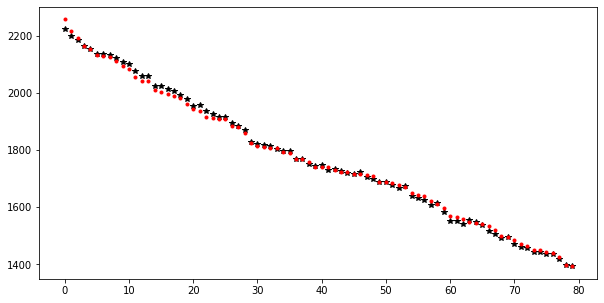

In [207]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(range(len(prediction)), prediction, 'k*')
plt.plot(range(len(prediction)), test_csv_data_real[2], 'r.')
plt.show()